In [1]:
# Imports etc
import torch
import matplotlib
import matplotlib.pyplot as plt

from src.utils.kpt_utils import kpts_2_img_coordinates, get_active_kpts

In [2]:
sample_nr = 2
#samples = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_full_seq_128pix/ulosd_sample_{sample_nr}/sample.pt')
samples = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_128pix/ulosd_sample_{sample_nr}/sample.pt')
#kpts = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_full_seq_128pix/ulosd_sample_{sample_nr}/key_points.pt')
kpts = torch.load(f'/home/yannik/vssil/eval/ulosd_vssil_new_128pix/ulosd_sample_{sample_nr}/key_points.pt')
print(samples.shape)
print(kpts.shape)

torch.Size([1, 30, 3, 128, 128])
torch.Size([1, 30, 48, 3])


In [3]:
int_threshold = 0.4

active_kpts = get_active_kpts(kpts, int_threshold)
# Adapt coordinate system
active_kpts[..., :2] *= -1
kpts[..., :2] *= -1
active_img_coordinates = kpts_2_img_coordinates(active_kpts, samples.shape[-2:])
img_coordinates = kpts_2_img_coordinates(kpts, samples.shape[-2:])
print(active_kpts.shape)
print(img_coordinates.shape)

torch.Size([1, 30, 18, 3])
torch.Size([1, 30, 48, 3])


In [4]:
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

## Plotting all key-points with mean intensity over threshold

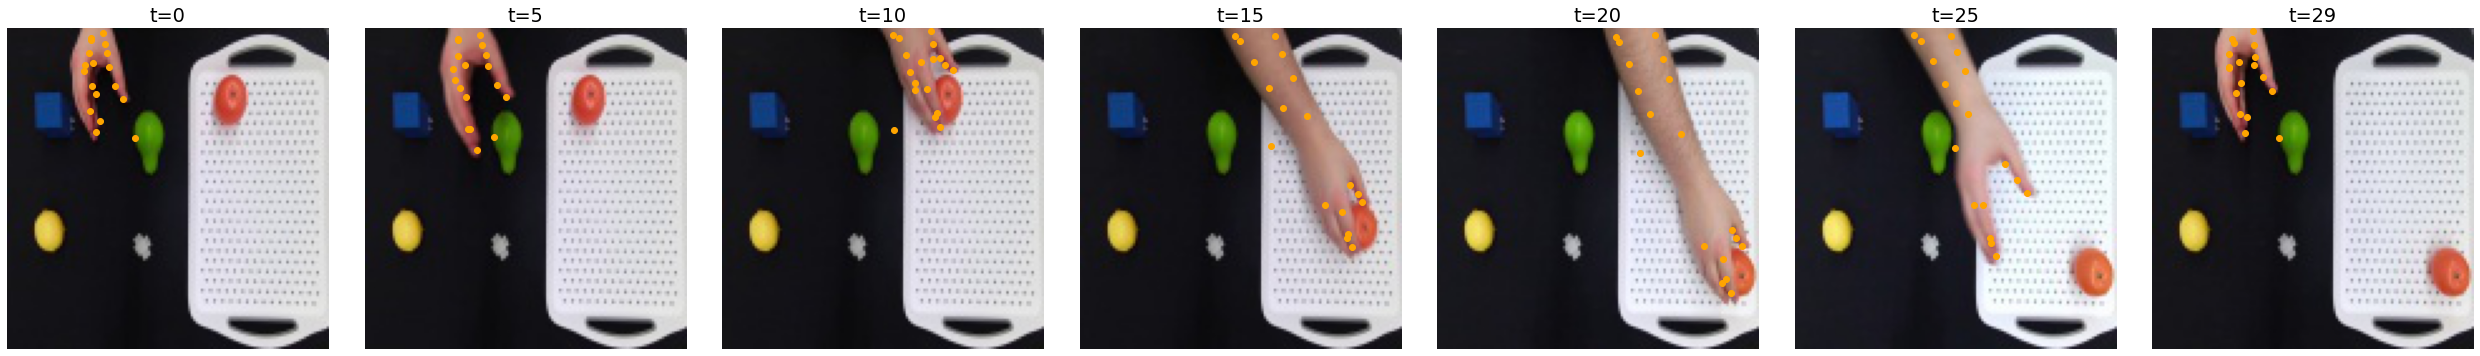

In [5]:
ts = [0, 5, 10, 15, 20, 25, 29]

fig, ax = plt.subplots(1, len(ts), figsize=(len(ts)*5, 5))

for i, t in enumerate(ts):
    ax[i].imshow(samples[0, t].permute(1, 2, 0))
    ax[i].set_title(f't={t}')
    ax[i].axis('off')
    for k in range(active_img_coordinates.shape[2]):
        ax[i].scatter(active_img_coordinates[0, t, k, 0], active_img_coordinates[0, t, k, 1], color='orange')

plt.tight_layout()
plt.show()
plt.close()

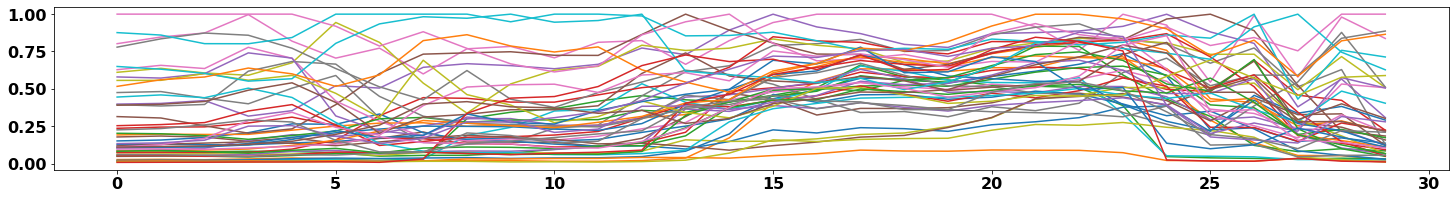

In [6]:
import numpy as np
plt.figure(figsize=(25, 3))
for k in range(img_coordinates.shape[2]):
    plt.plot(np.arange(0, 30), img_coordinates[0, :, k, 2].cpu().numpy())
plt.show()

## Plotting all key-points with current intensity over threshold

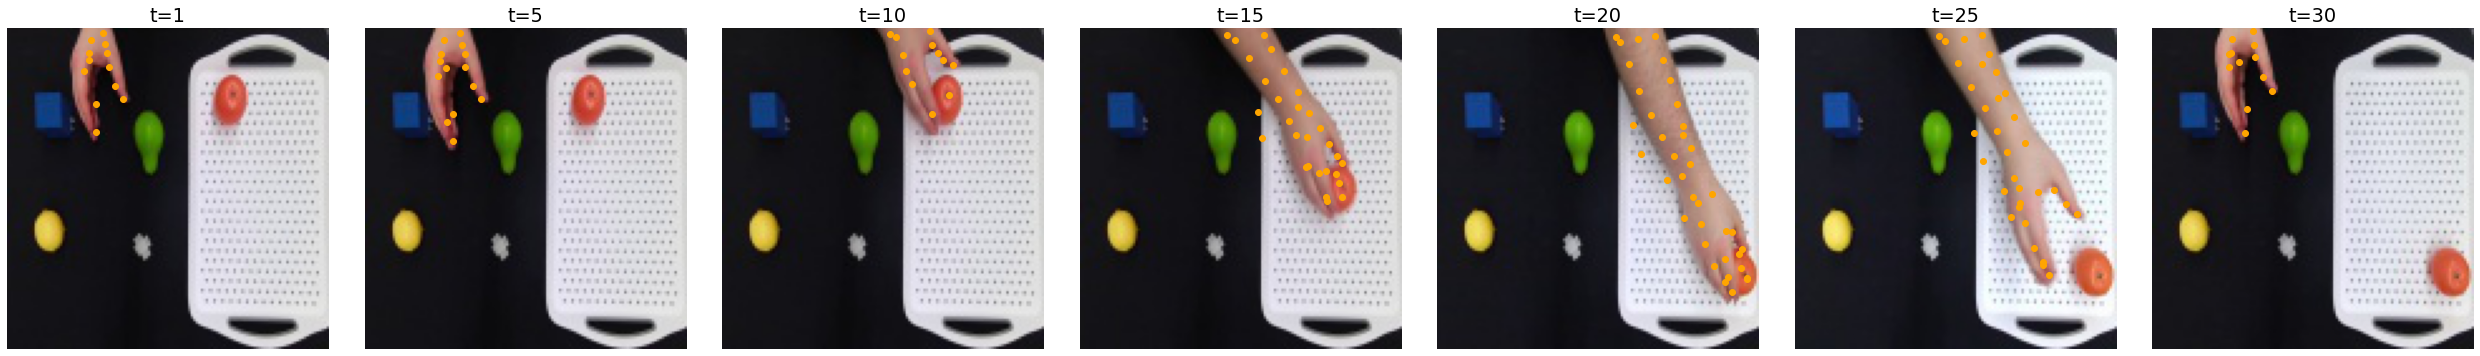

In [7]:
ts = [0, 4, 9, 14, 19, 24, 29]

fig, ax = plt.subplots(1, len(ts), figsize=(len(ts)*5, 5))

for i, t in enumerate(ts):
    ax[i].imshow(samples[0, t].permute(1, 2, 0))
    ax[i].set_title(f't={t+1}')
    ax[i].axis('off')
    for k in range(img_coordinates.shape[2]):
        if img_coordinates[0, t, k, 2] > int_threshold:
            ax[i].scatter(img_coordinates[0, t, k, 0], img_coordinates[0, t, k, 1], color='orange')

plt.tight_layout()
plt.show()
plt.close()

## Plotting k key-points with currently highest intensity

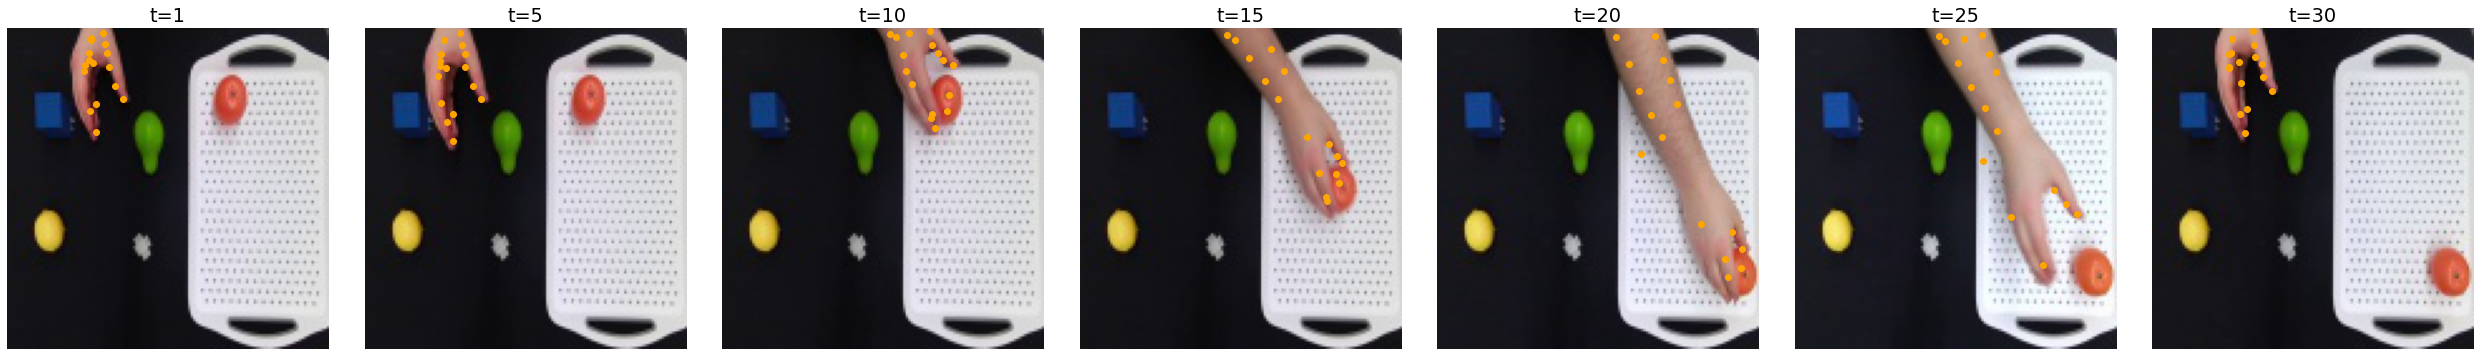

In [15]:
nk = 16

ts = [0, 4, 9, 14, 19, 24, 29]

fig, ax = plt.subplots(1, len(ts), figsize=(len(ts)*5, 5))

for i, t in enumerate(ts):
    ax[i].imshow(samples[0, t].permute(1, 2, 0))
    ax[i].set_title(f't={t+1}')
    ax[i].axis('off')
    
    # Sort key-points by intensity
    sorted_img_coordinates, ids = torch.sort(img_coordinates[..., 2], dim=-1, descending=True)
    
    for k in range(nk):
        ax[i].scatter(img_coordinates[0, t, ids[0, t, k], 0], img_coordinates[0, t, ids[0, t, k], 1], color='orange')

plt.tight_layout()
plt.show()
plt.close()